## Divide Shapefile into Tiles
This notebook divides an input shapefile by the coordinate grid into individual GeoJSONs or shapefiles. `coord_prec` denotes the edge length (in decimal coordinates) of each output tile. For each tile another output tile is produced with a buffer of `coord_prec / 100`, for use in generating spatial features rasters.

### Imports

In [7]:
import os
import json
import geopandas as gpd
import numpy as np
import fiona
from shapely.geometry import mapping, Polygon
from matplotlib import pyplot as plt

### Inputs and Directories

In [8]:
# set up directories
INPUT_DIR = '../../data/ghana/GHA_adm0/'
OUTPUT_DIR = '../../data/ghana/tiles'

# set up inputs/outputs
input_shp = 'GHA_adm0.shp'
coord_prec = 1
output_prefix = 'ghana'

# read inputs
in_shp = gpd.read_file(os.path.join(INPUT_DIR, input_shp))

### Extract Bounds of Shapefile

In [9]:
bounds_raw = in_shp.geometry.total_bounds
bounds = np.array([bounds_raw[0].round(),
                   bounds_raw[1].round(),
                   bounds_raw[2].round(),
                   bounds_raw[3].round()])
bounds

array([-3.,  5.,  1., 11.])

### Create Polygon Tiles

In [10]:
tiles = []
tiles_l = []
numCols = (bounds[2] - bounds[0])
numRows = (bounds[3] - bounds[1])

# function to allow steps < 1
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

# create tiles as Polygons with coord_prec edge length
for k in frange(0, (numRows), coord_prec):
    for i in frange(0, (numCols), coord_prec):
        tile = Polygon([(bounds[0]+i,   bounds[1]+k),
                        (bounds[0]+i+coord_prec, bounds[1]+k),
                        (bounds[0]+i+coord_prec, bounds[1]+k+coord_prec),
                        (bounds[0]+i,   bounds[1]+k+coord_prec)])
        tiles.append(tile)

# create larger Polygon tiles
for tile in tiles:
    l_buff = coord_prec / 100
    tile_l = tile.buffer(l_buff).envelope
    tiles_l.append(tile_l)

### Display

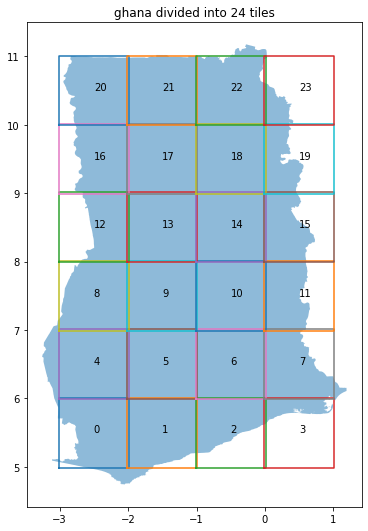

In [11]:
numTiles = int(numCols * numRows * (1 / coord_prec) ** 2)
fig, ax = plt.subplots(figsize=(6,14))
in_shp.plot(alpha=0.5, ax=ax)
plt.title(output_prefix + ' divided into ' + str(numTiles) + ' tiles')
for j in range(0, numTiles):
    x, y = tiles_l[j].exterior.xy
    cx, cy = tiles_l[j].centroid.xy
    plt.annotate(str(j), (cx[0], cy[0]))
    plt.plot(x,y)

### Save as GeoJSONs

In [ ]:
l = 0
for m in range(0, len(tiles)):
    tile_s_fn = output_prefix + '_s_' + str(l) + '.json'
    tile_l_fn = output_prefix + '_l_' + str(l) + '.json'
    tile_s_data = gpd.GeoSeries(tiles[m]).__geo_interface__
    tile_l_data = gpd.GeoSeries(tiles_l[m]).__geo_interface__
    with open(os.path.join(OUTPUT_DIR, tile_s_fn), 'w') as tile_s_file:
        json.dump(tile_s_data, tile_s_file)
    with open(os.path.join(OUTPUT_DIR, tile_l_fn), 'w') as tile_l_file:
        json.dump(tile_l_data, tile_l_file)
    l += 1

### Save as SHPs

In [12]:
# define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}

# save as SHP using fiona
l = 0
for m in range(0, len(tiles)):
    tile_s_fn = output_prefix + '_s_' + str(l)
    tile_l_fn = output_prefix + '_l_' + str(l)
    tile_s_fp = os.path.join(OUTPUT_DIR, tile_s_fn)
    tile_l_fp = os.path.join(OUTPUT_DIR, tile_l_fn)
    if not (os.path.isdir('tile_s_fp') or os.path.isdir('tile_l_fp')):
        os.makedirs(tile_s_fp)
        os.makedirs(tile_l_fp)
    with fiona.open(os.path.join(tile_s_fp,tile_s_fn+'.shp'), 'w', 'ESRI Shapefile', schema) as out_s_shp:
        out_s_shp.write({
            'geometry': mapping(tiles[l]),
            'properties': {'id': 123}
        })
    print(tile_s_fp)
    with fiona.open(os.path.join(tile_l_fp,tile_l_fn+'.shp'), 'w', 'ESRI Shapefile', schema) as out_l_shp:
        out_l_shp.write({
            'geometry': mapping(tiles_l[l]),
            'properties': {'id': 123}
        })
    print(tile_l_fp)
    l+=1

../../data/ghana/tiles/ghana_s_0
../../data/ghana/tiles/ghana_l_0
../../data/ghana/tiles/ghana_s_1
../../data/ghana/tiles/ghana_l_1
../../data/ghana/tiles/ghana_s_2
../../data/ghana/tiles/ghana_l_2
../../data/ghana/tiles/ghana_s_3
../../data/ghana/tiles/ghana_l_3
../../data/ghana/tiles/ghana_s_4
../../data/ghana/tiles/ghana_l_4
../../data/ghana/tiles/ghana_s_5
../../data/ghana/tiles/ghana_l_5
../../data/ghana/tiles/ghana_s_6
../../data/ghana/tiles/ghana_l_6
../../data/ghana/tiles/ghana_s_7
../../data/ghana/tiles/ghana_l_7
../../data/ghana/tiles/ghana_s_8
../../data/ghana/tiles/ghana_l_8
../../data/ghana/tiles/ghana_s_9
../../data/ghana/tiles/ghana_l_9
../../data/ghana/tiles/ghana_s_10
../../data/ghana/tiles/ghana_l_10
../../data/ghana/tiles/ghana_s_11
../../data/ghana/tiles/ghana_l_11
../../data/ghana/tiles/ghana_s_12
../../data/ghana/tiles/ghana_l_12
../../data/ghana/tiles/ghana_s_13
../../data/ghana/tiles/ghana_l_13
../../data/ghana/tiles/ghana_s_14
../../data/ghana/tiles/ghana_l_14
